# Multivariable Linear Regression by Hand
### Goal: understand the mathematical underpinnings of linear regression by writing the algorithm by hand
### Acceptance Criteria: Comparable results to sklearn's off the shelf linear regression results

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes

from ds_utils import normalize_features, train_test_split

In [2]:
class LinearRegression:
    """Class to conduct linear regression."""
    def __init__(self, X, y):
        """Initialize the class."""
        self.X = normalize_features(X)
        self.ones = np.ones((len(self.X), 1))
        self.X_b = np.concatenate((self.ones, self.X), axis=1)
        
        self.costs = []
        self.thetas = []
        self.y = y
    
    @staticmethod
    def predict(X, theta):
        """Take the dot product to calculate hypothesis."""
        return np.dot(X, theta)
    
    def step(self, X, y, theta, alpha=0.01):
        """Compute the cost and update thetas based on gradient calculations."""

        m = X.shape[0]
        h = self.predict(X, theta)

        cost = ((h - y)**2).sum() * (1 / (2 * m))

        # gradient of bias term
        # partial derivative of cost function wrt theta[0]
        grad_b = (h - y).sum() / m

        # gradient vector
        # partial derivative vector of the cost function wrt theta[1:]
        grad_m = (((h - y) * X.T).sum(axis=1) / m)[1:]
        grad_final = np.concatenate(([grad_b], grad_m))

        # update theta
        theta = theta - (grad_final * alpha)

        return cost, theta
    
    def fit(self, n_iter=1000):
        """Optimize thetas."""
        theta = np.zeros(self.trX_b.shape[1])
        for _ in range(n_iter):
            cost, theta = self.step(self.trX_b, self.tr_y, theta)
            self.costs.append(cost)
            self.thetas.append(theta)
    
    def build(self):
        """Build the model given the data."""
        self.trX_b, self.teX_b, self.tr_y, self.te_y = train_test_split(self.X_b, y)
        self.fit()
        self.coef = self.thetas[-1]
        
    def score(self):
        """Calculate score."""
        self.h = self.predict(self.teX_b, self.coef)
        self.score_coef = 1 - ( ((self.te_y - self.h) ** 2).sum() / ((self.te_y - self.te_y.mean()) ** 2).sum() )

Ideally, we'd add K-Fold Cross Validation to ensure we have a more complete understanding of how well this data fits, but the focus on this exercise is to understand the math behind Linear Regression

In [3]:
X, y = load_diabetes(return_X_y=True)
model = LinearRegression(X, y)
model.build()

Plot the cost

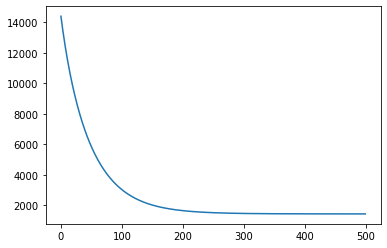

In [4]:
plt.plot(model.costs[:500])
plt.show()

In [5]:
print(f'Thetas: {model.coef}')
model.score()
print(f'R^2: {model.score_coef}')

Thetas: [151.0436969   -2.56476472 -10.30826449  26.65953041  15.02565053
  -3.8644367   -2.79242211 -10.17176869   2.04142009  21.91757542
   3.34600477]
R^2: 0.5238237831545267


In [6]:
from sklearn.linear_model import LinearRegression as skLinearRegression

X, y = load_diabetes(return_X_y=True)

# prep the data
X = normalize_features(X)
ones = np.ones((len(X), 1))
# add bias vector
X_b = np.concatenate((ones, X), axis=1)

trX, teX, tr_y, te_y = train_test_split(X_b, y)

sk_model = skLinearRegression(fit_intercept=True, normalize=True)
sk_model.fit(trX, tr_y)
h_final = sk_model.predict(teX)

print('Thetas: {}'.format([sk_model.intercept_] + list(sk_model.coef_)))
print('R^2: {}'.format(sk_model.score(teX, te_y)))

Thetas: [150.98838552081745, 0.0, -2.9215914125383198, -10.550120337300672, 26.215519243277328, 15.281082097087022, -36.118090421133026, 23.878256502066634, 3.0023000778135995, 4.272782507382381, 34.35027808404466, 3.074303934253169]
R^2: 0.5265528604780357


Using `skLinearRegression` as a benchmark, it seems that my custom `LinearRegression` class does a reasonable job at approximating a suitable model given the data. The R^2 scores, `0.524` and `0.527`, are close and coefficients (thetas) are comparable. 

# References
Math of gradient descent
- https://www.coursera.org/learn/machine-learning/supplement/aEN5G/gradient-descent-for-multiple-variables
- https://mccormickml.com/2014/03/04/gradient-descent-derivation/